In [1]:
# Importing the important libraries
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp


In [2]:
# Reading the data
data= pd.read_csv("preprocessedData.csv")
data=data.drop(['Unnamed: 0'], axis=1)
data

,id,dialect,transformed,fineText
0,939598542259277824,IQ,0,مثل ما داعش فجر تاريخ اجدادنا قبل سنه واحنه مع...
1,869345568534941696,IQ,0,احنا سنه وحق الله منفرق بس حسبى الله ونعم الوك...
2,936739253412917248,IQ,0,الكاوليه هنود مو عرب خلك غلابه عايشين بدون مشا...
3,995964915583156224,IQ,0,عليمن انطلع حركتنه بس ريد اذكر الزواج الى صدكو بى
4,633976940433510400,IQ,0,شيلوو اشتهر حسونى مع نور الزين والردح الزين
...,...,...,...,...
17995,1153015108106444800,BH,17,اى حتى الطير صايدتنه عدل
17996,1015716046085468160,BH,17,اشتكت لزوجها احس انى متضايقه فرد عليها الحنون ...
17997,1016457209851580416,BH,17,انت القمر بوسط ليلى انت مرى وحلمى انت النور لع...
17998,1153244931269566464,BH,17,عجيبه الصراحه ويامنظر الطبيعه تنسى كلشى الله ي...


In [3]:
# Data type of each column
data.dtypes

id              int64
dialect        object
transformed     int64
fineText       object
dtype: object

In [4]:
# Missing values in the data
nullData= data.isnull().sum()
nullData

id             0
dialect        0
transformed    0
fineText       9
dtype: int64

In [5]:
# Dropping the null values in the data
data= data.dropna(axis=0)
# Ensuring that there are no missing values
data.isnull().sum() / data.shape[0] * 100

id             0.0
dialect        0.0
transformed    0.0
fineText       0.0
dtype: float64

In [6]:
# Putting each word in an array, so the sentence would be array of array of words
data['fineText'] = data['fineText'].apply(lambda x: [str(word.split()) for word in x.split()]) 
data['fineText'] = data['fineText'].apply(lambda x: ' '.join(map(str, x)))
data

/var/folders/_m/2b51_hvs78l5wwx7k1rkzlym0000gn/T/ipykernel_1138/246733476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fineText'] = data['fineText'].apply(lambda x: [str(word.split()) for word in x.split()])
/var/folders/_m/2b51_hvs78l5wwx7k1rkzlym0000gn/T/ipykernel_1138/246733476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fineText'] = data['fineText'].apply(lambda x: ' '.join(map(str, x)))


,id,dialect,transformed,fineText
0,939598542259277824,IQ,0,['مثل'] ['ما'] ['داعش'] ['فجر'] ['تاريخ'] ['اج...
1,869345568534941696,IQ,0,['احنا'] ['سنه'] ['وحق'] ['الله'] ['منفرق'] ['...
2,936739253412917248,IQ,0,['الكاوليه'] ['هنود'] ['مو'] ['عرب'] ['خلك'] [...
3,995964915583156224,IQ,0,['عليمن'] ['انطلع'] ['حركتنه'] ['بس'] ['ريد'] ...
4,633976940433510400,IQ,0,['شيلوو'] ['اشتهر'] ['حسونى'] ['مع'] ['نور'] [...
...,...,...,...,...
17995,1153015108106444800,BH,17,['اى'] ['حتى'] ['الطير'] ['صايدتنه'] ['عدل']
17996,1015716046085468160,BH,17,['اشتكت'] ['لزوجها'] ['احس'] ['انى'] ['متضايقه...
17997,1016457209851580416,BH,17,['انت'] ['القمر'] ['بوسط'] ['ليلى'] ['انت'] ['...
17998,1153244931269566464,BH,17,['عجيبه'] ['الصراحه'] ['ويامنظر'] ['الطبيعه'] ...


In [8]:
# Performing embedding using and storing the embedding in the dataset
vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(data['fineText'])


RNN model:

In [9]:
# Importing Libraries:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt


In [9]:
'''import tensorflow as tf
import tensorflow.python.keras.backend as K 
sess = K.get_session()'''

'import tensorflow as tf\nimport tensorflow.python.keras.backend as K \nsess = K.get_session()'

In [10]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, data['transformed'], test_size=0.2, random_state=42)

In [11]:
# Splitting of data to train and test
X_train, X_test, y_train, y_test = train_test_split(embeddings, data['transformed'], test_size=0.2, random_state=1)

# Converting the splitted data to arrays
X_train= X_train.toarray()
X_test=X_test.toarray()

# Converting the X_train and X_test to type float as they are written 0. not 0.0 
# Reshaping them back to their original shape as they were flattened 
X_train=np.asarray(X_train).astype('float32').reshape(X_train.shape[0],1,X_train.shape[1])
X_test=np.asarray(X_test).astype('float32').reshape(X_test.shape[0],1,X_test.shape[1])

# Encoding the y_train and y_test:
y_train= np.array(y_train)
y_train_hot=np.zeros((y_train.size,y_train.max()+1))
y_train_hot[np.arange(y_train.size),y_train]=1

y_test= np.array(y_test)
y_test_hot=np.zeros((y_test.size,y_test.max()+1))
y_test_hot[np.arange(y_test.size),y_test]=1

In [28]:
# Defining RNN model
model = Sequential()
model.add(SimpleRNN(128,return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train_hot,epochs=4)

Epoch 1/4
450/450 [==============================] - 8s 16ms/step - loss: 2.7301 - accuracy: 0.1123
Epoch 2/4
450/450 [==============================] - 7s 16ms/step - loss: 2.1174 - accuracy: 0.2454
Epoch 3/4
450/450 [==============================] - 7s 16ms/step - loss: 1.4254 - accuracy: 0.4705
Epoch 4/4
450/450 [==============================] - 7s 16ms/step - loss: 0.8425 - accuracy: 0.7050


In [25]:
model2 = Sequential()
model2.add(SimpleRNN(128,return_sequences=True))
model2.add(SimpleRNN(64))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dropout(0.8))
model2.add(Flatten())
model2.add(Dense(units=18, activation='sigmoid'))
model2.compile(loss='categorical_crossentropy', optimizer='SGD',metrics=['accuracy'])
model.fit(X_train, y_train_hot,batch_size=40,epochs=10)

Epoch 1/10
360/360 [==============================] - 6s 17ms/step - loss: 0.0396 - accuracy: 0.9895
Epoch 2/10
360/360 [==============================] - 6s 16ms/step - loss: 0.0330 - accuracy: 0.9910
Epoch 3/10
360/360 [==============================] - 6s 15ms/step - loss: 0.0257 - accuracy: 0.9929
Epoch 4/10
360/360 [==============================] - 6s 16ms/step - loss: 0.0348 - accuracy: 0.9918
Epoch 5/10
360/360 [==============================] - 5s 15ms/step - loss: 0.0648 - accuracy: 0.9857
Epoch 6/10
360/360 [==============================] - 6s 15ms/step - loss: 0.0471 - accuracy: 0.9894
Epoch 7/10
360/360 [==============================] - 5s 15ms/step - loss: 0.0250 - accuracy: 0.9933
Epoch 8/10
360/360 [==============================] - 6s 16ms/step - loss: 0.0200 - accuracy: 0.9961
Epoch 9/10
360/360 [==============================] - 6s 15ms/step - loss: 0.0142 - accuracy: 0.9964
Epoch 10/10
360/360 [==============================] - 6s 16ms/step - loss: 0.0204 - accura

In [30]:
# Evaluate the model on the test data
loss, accuracy= model.evaluate(X_test, y_test_hot)
print('Test loss:', loss*100,'%')
print('Test accuracy:', accuracy*100,'%')
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_hot, axis=1)
f1 = f1_score(y_true, y_pred,average='weighted')
print("F1 score:", f1)

113/113 [==============================] - 1s 5ms/step - loss: 2.8990 - accuracy: 0.2365
Test loss: 289.900541305542 %
Test accuracy: 23.6454576253891 %
113/113 [==============================] - 1s 4ms/step
F1 score: 0.2459667711470684


In [29]:
# Evaluate the model on the test data
loss, accuracy= model2.evaluate(X_test, y_test_hot)
print('Test loss:', loss*100,'%')
print('Test accuracy:', accuracy*100,'%')
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_hot, axis=1)
f1 = f1_score(y_true, y_pred,average='weighted')
print("F1 score:", f1)

113/113 [==============================] - 0s 4ms/step - loss: 2.8904 - accuracy: 0.0558
Test loss: 289.04130458831787 %
Test accuracy: 5.584884807467461 %
113/113 [==============================] - 1s 4ms/step
F1 score: 0.2459667711470684


In [31]:
from sklearn.metrics import classification_report

target_names = ["class_{}".format(i) for i in range(18)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.47      0.28      0.35       202
     class_1       0.30      0.32      0.31       177
     class_2       0.52      0.11      0.18       206
     class_3       0.16      0.22      0.18       210
     class_4       0.27      0.27      0.27       202
     class_5       0.40      0.31      0.35       202
     class_6       0.16      0.24      0.19       197
     class_7       0.54      0.36      0.43       196
     class_8       0.17      0.16      0.17       215
     class_9       0.09      0.26      0.14       204
    class_10       0.32      0.37      0.34       186
    class_11       0.37      0.38      0.38       193
    class_12       0.42      0.10      0.16       198
    class_13       0.21      0.17      0.19       201
    class_14       0.14      0.15      0.14       213
    class_15       0.93      0.23      0.37       184
    class_16       0.20      0.13      0.15       206
    class_17       0.14    

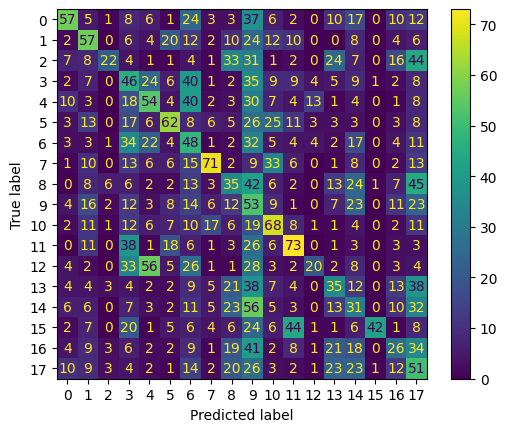

<Figure size 640x480 with 0 Axes>

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(18))
cm_display.plot()
plt.show()
plt.savefig('ConfusionMatrixSVM.png')